In [ ]:
# 1. Abstracto con Motivación y Audiencia

## Motivación:
##Analizar los datos demográficos de los municipios para identificar patrones y tendencias en la distribución de la población. Específicamente, predecir la población rural dispersa en base a las características demográficas de los municipios.

## Audiencia:
##Gobiernos locales y regionales, demógrafos, urbanistas y organizaciones no gubernamentales interesadas en el desarrollo rural y la planificación de recursos.

# 2. Preguntas/Problema que Buscamos Resolver

## Problema Principal:
##Predecir la población rural dispersa (HombresRuralDisperso + MujeresRuralDisperso) en un municipio basado en las características demográficas del municipio (Edad, Hombres_Cabecera, Mujeres_Cabecera, etc.). Este es un problema de regresión.


In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install seaborn 

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install sqlalchemy


[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sqlalchemy import create_engine
import numpy as np

In [7]:
# Crear la conexión a la base de datos
user = 'root'
password = 'Chowder1226'
host = 'localhost'
port = '3308'
database = 'dataset'

In [8]:
engine = create_engine(f'mysql+mysqldb://{user}:{password}@{host}:{port}/{database}')

In [9]:
query = 'SELECT * FROM municipios'
datos = pd.read_sql(query, engine)

In [10]:
# Mostrar los primeros registros
print(datos.head())

   CodigoMunicipio NombreMunicipio  Edad  Hombres_Cabecera  Mujeres_Cabecera  \
0             5001        Medellín     0             11374             10739   
1             5001        Medellín     1             12173             11637   
2             5001        Medellín     2             12795             12012   
3             5001        Medellín     3             12796             12197   
4             5001        Medellín     4             12518             11949   

   Hombres_CentroPoblado  Mujeres_CentroPoblado  HombresRuralDisperso  \
0                    131                    110                    85   
1                    126                    120                   109   
2                    137                    103                   108   
3                    120                    126                   119   
4                    103                    116                    82   

   MujeresRuralDisperso  
0                    99  
1                   116  
2 

In [11]:
# Descripción estadística de los datos
print(datos.describe())

       CodigoMunicipio          Edad  Hombres_Cabecera  Mujeres_Cabecera  \
count     12825.000000  12825.000000      12825.000000      12825.000000   
mean       5414.214503     51.056452        175.289201        195.500897   
std         279.777754     30.071690       1166.741657       1268.876238   
min        5001.000000      0.000000          0.000000          0.000000   
25%        5147.000000     25.000000          8.000000          9.000000   
50%        5376.000000     51.000000         22.000000         25.000000   
75%        5659.000000     76.000000         62.000000         70.000000   
max        5895.000000    121.000000      23302.000000      23181.000000   

       Hombres_CentroPoblado  Mujeres_CentroPoblado  HombresRuralDisperso  \
count           12825.000000           12825.000000          12825.000000   
mean               12.818791              13.021365             35.890526   
std                35.051734              35.472864             41.585535   
min    

In [12]:
# Verificar valores faltantes
print(datos.isnull().sum())

CodigoMunicipio          0
NombreMunicipio          0
Edad                     0
Hombres_Cabecera         0
Mujeres_Cabecera         0
Hombres_CentroPoblado    0
Mujeres_CentroPoblado    0
HombresRuralDisperso     0
MujeresRuralDisperso     0
dtype: int64


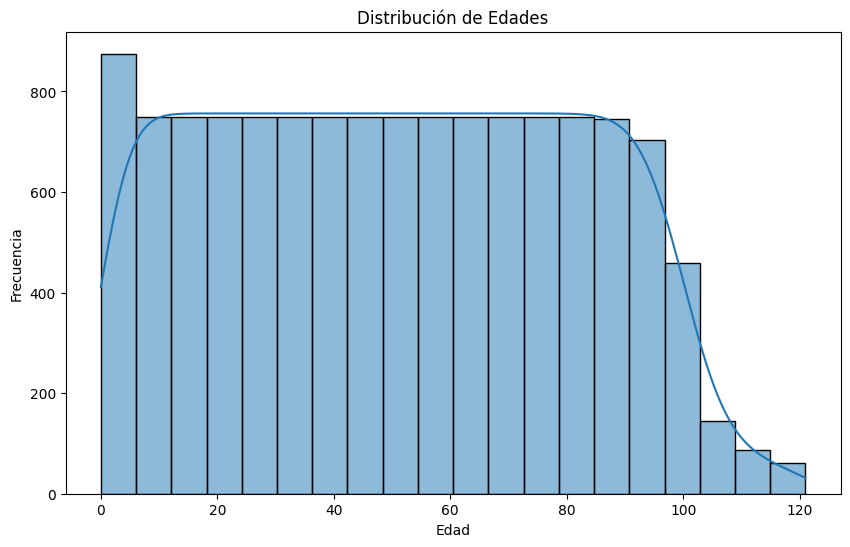

In [13]:
# Análisis visual
plt.figure(figsize=(10, 6))
sns.histplot(datos['Edad'], bins=20, kde=True)
plt.title('Distribución de Edades')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

In [28]:
# Agrupar por municipio y sumar las poblaciones de cabecera
datos_municipio_cabecera = datos.groupby('NombreMunicipio')[['Hombres_Cabecera', 'Mujeres_Cabecera']].sum()

# Seleccionar los cinco municipios con mayor población
municipios_mayor_poblacion = datos_municipio_cabecera.sum(axis=1).nlargest(10).index

# Filtrar los datos para incluir solo los municipios seleccionados
datos_seleccionados = datos_municipio_cabecera.loc[municipios_mayor_poblacion]



In [29]:
sns.set(style="whitegrid")

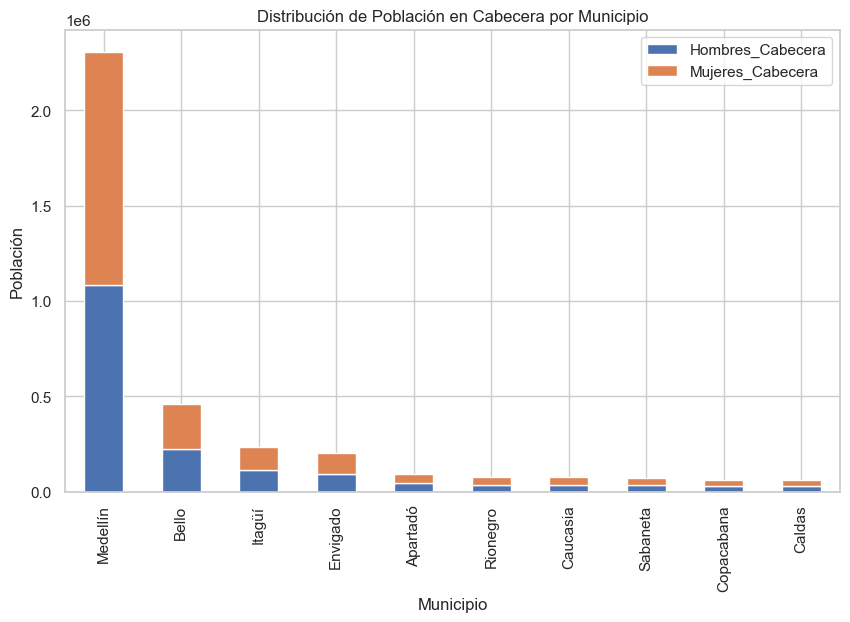

In [30]:
# Crear el gráfico de barras apiladas con Seaborn
datos_seleccionados.plot(kind='bar', stacked=True, figsize=(10, 6))

# Añadir título y etiquetas de los ejes
plt.title('Distribución de Población en Cabecera por Municipio')
plt.xlabel('Municipio')
plt.ylabel('Población')

# Mostrar el gráfico
plt.show()

In [15]:
from sklearn.preprocessing import StandardScaler

# Crear nueva variable para la población rural dispersa total
datos['Poblacion_RuralDisperso'] = datos['HombresRuralDisperso'] + datos['MujeresRuralDisperso']

# Seleccionar variables relevantes y normalizarlas
features = datos[['Edad', 'Hombres_Cabecera', 'Mujeres_Cabecera', 'Hombres_CentroPoblado', 'Mujeres_CentroPoblado']]
target = datos['Poblacion_RuralDisperso']

scaler = StandardScaler()
features_normalized = scaler.fit_transform(features)


In [16]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


In [17]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features_normalized, target, test_size=0.2, random_state=42)

In [18]:
# Definir los modelos
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

In [19]:
# Entrenar y evaluar cada modelo
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f'{name} Mean Squared Error: {mse}')

Linear Regression Mean Squared Error: 3674.2473008249995
Random Forest Mean Squared Error: 1672.5895608127528


In [20]:
from sklearn.model_selection import GridSearchCV

In [21]:
# Definir la búsqueda de hiperparámetros para Random Forest
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

In [22]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error')

In [23]:
print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'max_depth': 30, 'min_samples_split': 2, 'n_estimators': 200}


In [24]:
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test)
mse_best = mean_squared_error(y_test, y_pred_best)

print(f'Best Model Mean Squared Error: {mse_best}')

Best Model Mean Squared Error: 1667.9834016710272
